In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Downloads/categ.csv")
df.head()

,Unnamed: 0,size,material,color,sleeves,demand
0,0,S,nylon,white,long,medium
1,1,XL,polyester,cream,short,high
2,2,S,silk,blue,short,medium
3,3,M,cotton,black,short,medium
4,4,XL,polyester,orange,long,medium


In [3]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.head()

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [4]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns[:-1]:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    

In [5]:
df

,size,material,color,sleeves,demand
0,3,2,8,0,medium
1,4,3,2,1,high
2,3,4,1,1,medium
3,2,0,0,1,medium
4,4,3,5,0,medium
...,...,...,...,...,...
9995,2,2,0,0,medium
9996,1,0,8,0,high
9997,6,2,0,0,medium
9998,3,1,8,0,high


In [6]:
X=df.drop('demand',axis=1).values
y=df['demand']


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.6555
[[681   0 212]
 [ 74  37 147]
 [255   1 593]]
              precision    recall  f1-score   support

        high       0.67      0.76      0.72       893
         low       0.97      0.14      0.25       258
      medium       0.62      0.70      0.66       849

    accuracy                           0.66      2000
   macro avg       0.76      0.53      0.54      2000
weighted avg       0.69      0.66      0.63      2000



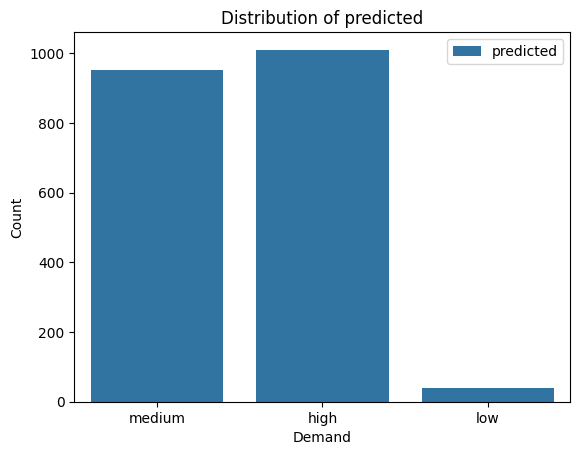

In [11]:
import seaborn as sns
sns.countplot(x=y_pred, label='predicted')
plt.xlabel('Demand')
plt.ylabel('Count')
plt.title('Distribution of predicted')
plt.legend()
plt.show()

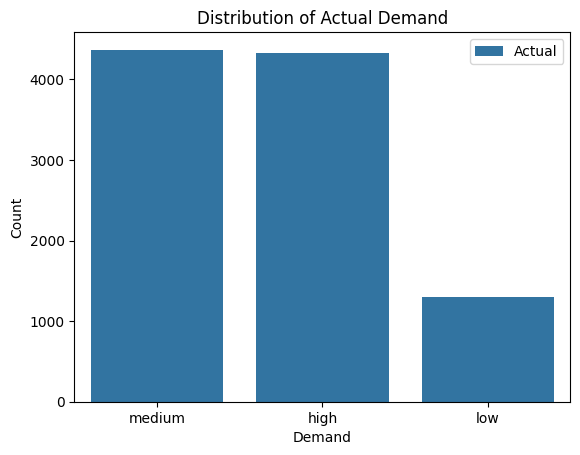

In [12]:
sns.countplot(x='demand', data=df,label='Actual')
plt.xlabel('Demand')
plt.ylabel('Count')
plt.title('Distribution of Actual Demand')
plt.legend()
plt.show()
